In [227]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

In [228]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [229]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [230]:
#%matplotlib inline

In [231]:
writeDir = "write/"

fileName = "Ji2020_Skin"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


In [232]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

# Read In Data

In [233]:
inDir = 'data/Ji2020_Skin'
inputCellsFile = f'{inDir}/Cells.csv'
inputMtxFile = f'{inDir}/Exp_data_UMIcounts.mtx'
inputGenesFile = f'{inDir}/Genes.txt'
inMetaFile = f'{inDir}/Meta-data.csv'

In [234]:
adata = sc.read_mtx(inputMtxFile).T
adata

AnnData object with n_obs × n_vars = 48164 × 32738

In [235]:
cells =  pd.read_table(inputCellsFile, delimiter=",", index_col=0)
cells

sample  source   cell_type cell_subtype_level1  \
cell_name                                                                    
P1_Tumor_AAACCTGAGTCAAGCG       P1   Tumor   Malignant       Tumor_KC_Diff   
P1_Tumor_AAACCTGCAAATTGCC       P1   Tumor  Epithelial        Keratinocyte   
P1_Tumor_AAACCTGGTAGGAGTC       P1   Tumor   Malignant      Tumor_KC_Basal   
P1_Tumor_AAACGGGAGATGTAAC       P1   Tumor   Malignant      Tumor_KC_Basal   
P1_Tumor_AAACGGGAGCTGCAAG       P1   Tumor   Malignant        Tumor_KC_Cyc   
...                            ...     ...         ...                 ...   
P10_Normal_TTTGTCAAGAGTCTGG    P10  Normal  Epithelial      Normal_KC_Diff   
P10_Normal_TTTGTCAAGTCGTTTG    P10  Normal  Langerhans     Langerhans_cell   
P10_Normal_TTTGTCACAGTGGGAT    P10  Normal  Langerhans     Langerhans_cell   
P10_Normal_TTTGTCATCCAGGGCT    P10  Normal  Langerhans     Langerhans_cell   
P10_Normal_TTTGTCATCGAGGTAG    P10  Normal  Epithelial     Normal_KC_Basal   

                            cell_subtype_level2  complexity  
cell_name                                                    
P1_Tumor_AAACCTGAGTCAAGCG         Tumor_KC_Diff        5206  
P1_Tumor_AAACCTGCAAATTGCC          Keratinocyte        3468  
P1_Tumor_AAACCTGGTAGGAGTC        Tumor_KC_Basal        4154  
P1_Tumor_AAACGGGAGATGTAAC        Tumor_KC_Basal        4334  
P1_Tumor_AAACGGGAGCTGCAAG          Tumor_KC_Cyc        4822  
...                                         ...         ...  
P10_Normal_TTTGTCAAGAGTCTGG      Normal_KC_Diff        1659  
P10_Normal_TTTGTCAAGTCGTTTG     Langerhans_cell        3541  
P10_Normal_TTTGTCACAGTGGGAT     Langerhans_cell        2540  
P10_Normal_TTTGTCATCCAGGGCT     Langerhans_cell        1849  
P10_Normal_TTTGTCATCGAGGTAG     Normal_KC_Basal        1598  

[48164 rows x 6 columns]

In [236]:
genes =  pd.read_table(inputGenesFile, delimiter=",", index_col=0, header=None)
genes.index.names = ['genes']
genes

Empty DataFrame
Columns: []
Index: [RP11-34P13.7, AL627309.1, AP006222.2, RP4-669L17.10, RP11-206L10.3, RP11-206L10.2, RP11-206L10.9, FAM87B, LINC00115, FAM41C, RP11-54O7.1, SAMD11, NOC2L, KLHL17, PLEKHN1, RP11-54O7.17, HES4, ISG15, AGRN, RNF223, C1orf159, RP11-465B22.8, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, FAM132A, RP5-902P8.12, UBE2J2, SCNN1D, ACAP3, PUSL1, CPSF3L, GLTPD1, DVL1, MXRA8, AURKAIP1, CCNL2, RP4-758J18.2, MRPL20, RP4-758J18.13, ANKRD65, VWA1, ATAD3C, ATAD3B, ATAD3A, SSU72, AL645728.1, C1orf233, RP11-345P4.9, MIB2, MMP23B, CDK11B, RP11-345P4.10, SLC35E2B, CDK11A, SLC35E2, NADK, GNB1, TMEM52, C1orf222, GABRD, RP11-547D24.3, PRKCZ, RP5-892K4.1, RP11-181G12.2, C1orf86, AL590822.2, AL590822.1, RP11-181G12.4, SKI, MORN1, RER1, PEX10, PLCH2, PANK4, HES5, RP3-395M20.12, TNFRSF14, FAM213B, MMEL1, TTC34, ARHGEF16, RP11-168F9.2, MEGF6, TPRG1L, WRAP73, TP73, TP73-AS1, SMIM1, LRRC47, CEP104, DFFB, C1orf174, LINC01134, AJAP1, NPHP4, KCNAB2, RPL22, ...]

[32738 rows x 0 columns]

In [237]:
meta =  pd.read_table(inMetaFile, delimiter=",", index_col=0, header=0)
meta

technology  n_cells patient                        cancer_type sex  \
sample                                                                      
P1            10x     2382      P1  Cutaneous Squamous Cell Carcinoma   M   
P10           10x     4569     P10  Cutaneous Squamous Cell Carcinoma   M   
P2            10x     6824      P2  Cutaneous Squamous Cell Carcinoma   M   
P3            10x     1742      P3  Cutaneous Squamous Cell Carcinoma   F   
P4            10x     7956      P4  Cutaneous Squamous Cell Carcinoma   F   
P5            10x     2494      P5  Cutaneous Squamous Cell Carcinoma   M   
P6            10x     6660      P6  Cutaneous Squamous Cell Carcinoma   F   
P7            10x     5511      P7  Cutaneous Squamous Cell Carcinoma   M   
P8            10x     3507      P8  Cutaneous Squamous Cell Carcinoma   M   
P9            10x     6519      P9  Cutaneous Squamous Cell Carcinoma   M   

        age  smoking_status  PY diagnosis_recurrence  disease_extent  ...  \
sample                                                                ...   
P1       83             NaN NaN            diagnosis             NaN  ...   
P10      71             NaN NaN           recurrence             NaN  ...   
P2       69             NaN NaN            diagnosis             NaN  ...   
P3       71             NaN NaN            diagnosis             NaN  ...   
P4       75             NaN NaN            diagnosis             NaN  ...   
P5       98             NaN NaN            diagnosis             NaN  ...   
P6       96             NaN NaN            diagnosis             NaN  ...   
P7       75             NaN NaN            diagnosis             NaN  ...   
P8       63             NaN NaN            diagnosis             NaN  ...   
P9       87             NaN NaN            diagnosis             NaN  ...   

        targeted_rx_response  ICB_exposed  ICB_response   ET_exposed  \
sample                                                                 
P1               not exposed  not exposed   not exposed  not exposed   
P10                      NaN          NaN           NaN          NaN   
P2               not exposed  not exposed   not exposed  not exposed   
P3               not exposed  not exposed   not exposed  not exposed   
P4               not exposed  not exposed   not exposed  not exposed   
P5               not exposed  not exposed   not exposed  not exposed   
P6               not exposed  not exposed   not exposed  not exposed   
P7               not exposed  not exposed   not exposed  not exposed   
P8               not exposed  not exposed   not exposed  not exposed   
P9               not exposed  not exposed   not exposed  not exposed   

        ET_response  time_end_of_rx_to_sampling post_sampling_rx_exposed  \
sample                                                                     
P1      not exposed                         NaN                      NaN   
P10             NaN                         NaN                      NaN   
P2      not exposed                         NaN                      NaN   
P3      not exposed                         NaN                      NaN   
P4      not exposed                         NaN                      NaN   
P5      not exposed                         NaN                      NaN   
P6      not exposed                         NaN                      NaN   
P7      not exposed                         NaN                      NaN   
P8      not exposed                         NaN                      NaN   
P9      not exposed                         NaN                      NaN   

       post_sampling_rx_response  PFS_DFS  OS  
sample                                         
P1                           NaN      NaN NaN  
P10                          NaN      NaN NaN  
P2                           NaN      NaN NaN  
P3                           NaN      NaN NaN  
P4                           NaN      NaN NaN  
P5                           NaN      NaN N

In [239]:
adata.obs = cells
adata.var = genes
adata

AnnData object with n_obs × n_vars = 48164 × 32738
    obs: 'sample', 'source', 'cell_type', 'cell_subtype_level1', 'cell_subtype_level2', 'complexity'

In [240]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [243]:
adata = adata[adata.obs.cell_type=="Malignant"]

# QC

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


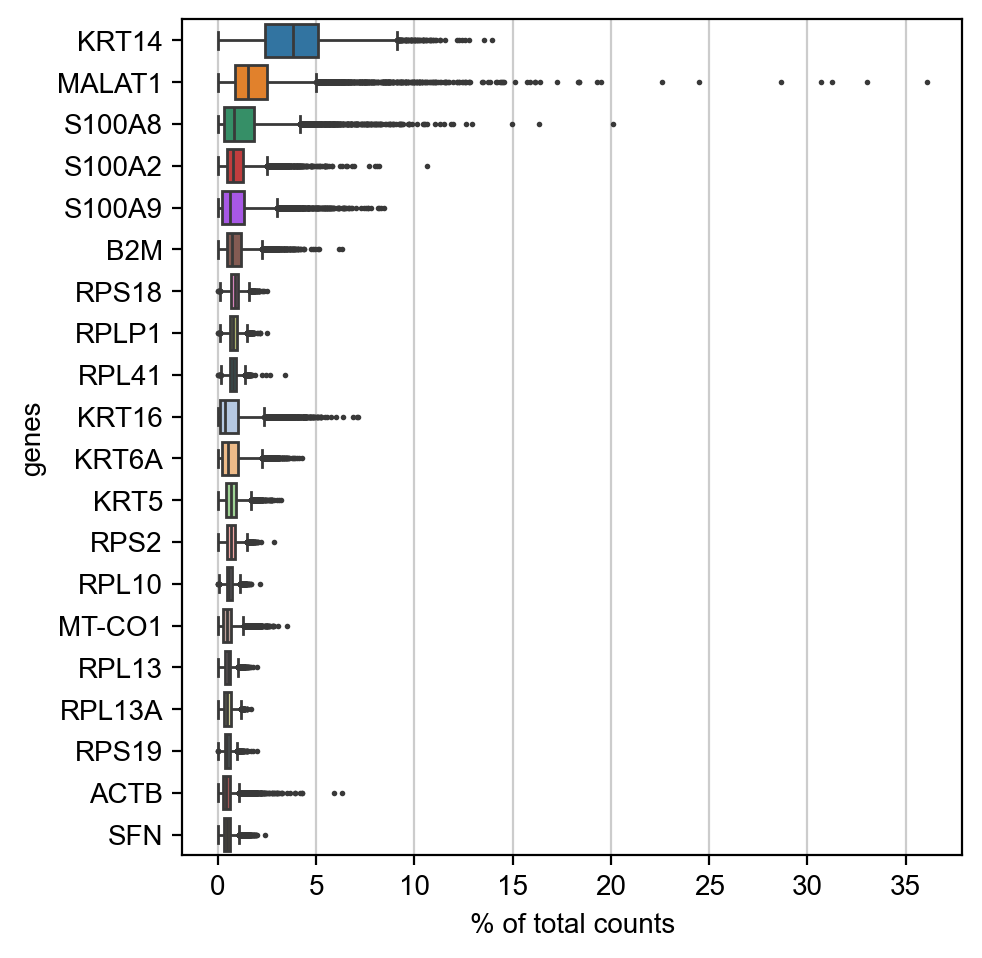

In [244]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_2149317/3542297969.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


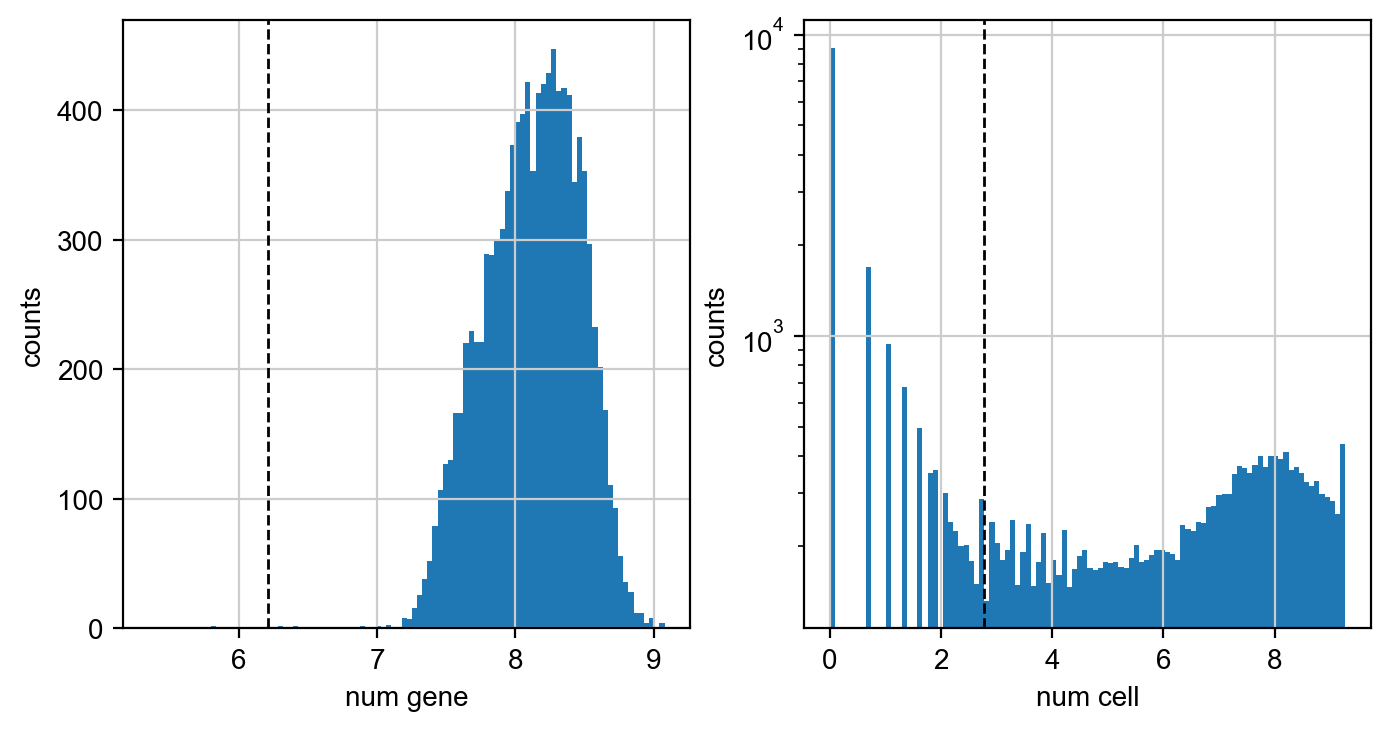

In [245]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [246]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 8 cells that have less than 500 genes expressed
filtered out 15200 genes that are detected in less than 15 cells


In [247]:
adata = adata[:,np.logical_not(adata.var_names=="MALAT1")]

## Mito QC

In [248]:
for g in adata.var_names:
    if "MT" == g[:2]:
        print(g)

MTOR
MTHFR
MTFR1L
MTF1
MTF2
MTMR11
MTX1
MTR
MT1HL1
MTA3
MTIF2
MTHFD2
MTX2
MTERFD2
MTMR14
MTRNR2L12
MTHFD2L
MTRR
MTMR12
MTX3
MTRNR2L2
MTCH1
MTRNR2L9
MTO1
MTFR2
MTHFD1L
MTRF1L
MTURN
MTERF
MTPN
MTRNR2L6
MTRNR2L10
MTMR8
MTM1
MTMR1
MTCP1
MTMR9
MTUS1
MTFR1
MTERFD1
MTDH
MTBP
MTSS1
MTAP
MTPAP
MTG1
MTRNR2L8
MTCH2
MTA2
MTL5
MTMR2
MTERFD3
MTMR6
MTIF3
MTRF1
MTHFD1
MTA1
MTMR10
MTFMT
MTHFS
MT4
MT2A
MT1E
MT1M
MT1A
MT1F
MT1G
MT1H
MT1X
MTSS1L
MTHFSD
MTRNR2L1
MTMR4
MTRNR2L3
MTG2
MTMR3
MTFP1
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4
MT-ND5
MT-ND6
MT-CYB
MT1B


In [249]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/tmp/ipykernel_2149317/2933791377.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


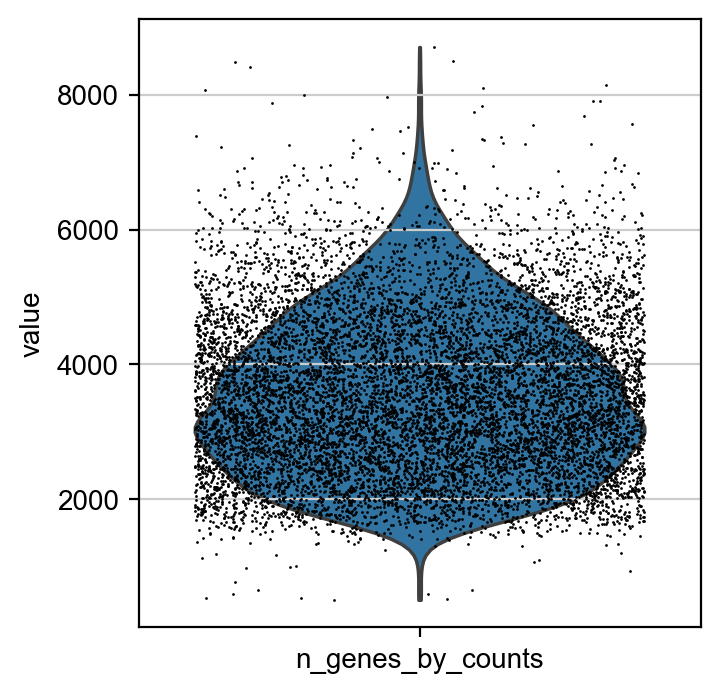

In [250]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


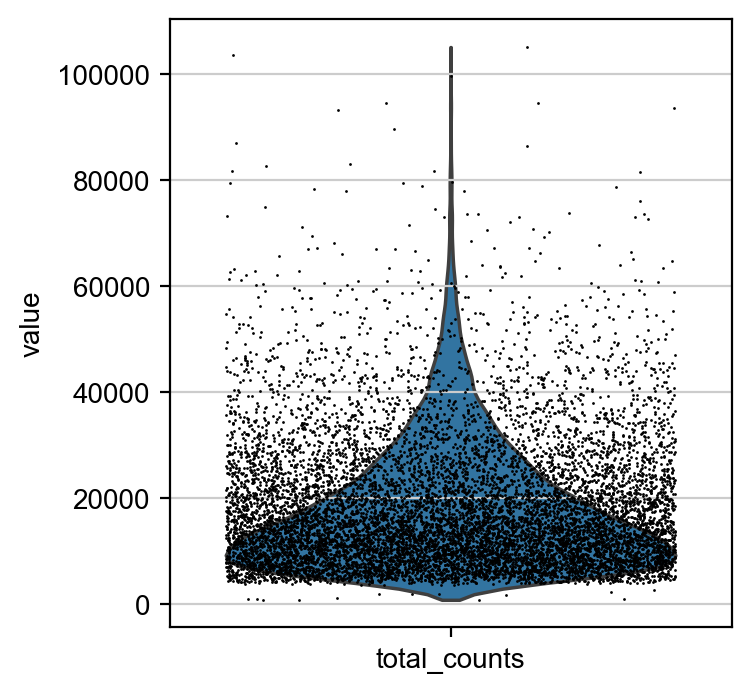

In [251]:
sc.pl.violin(adata, ['total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


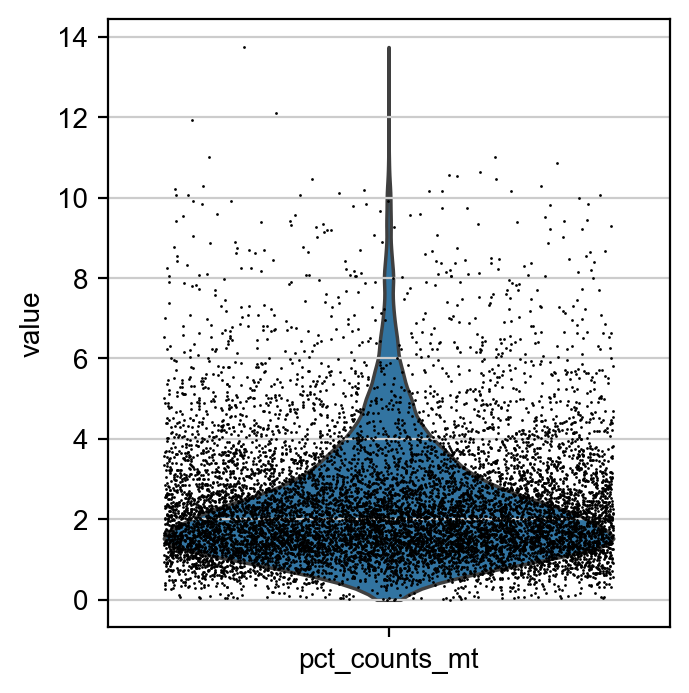

In [252]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

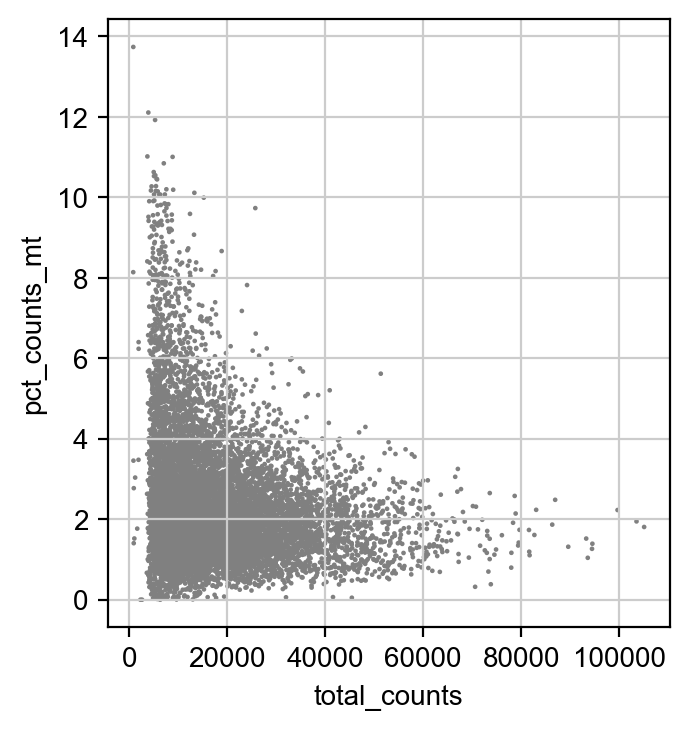

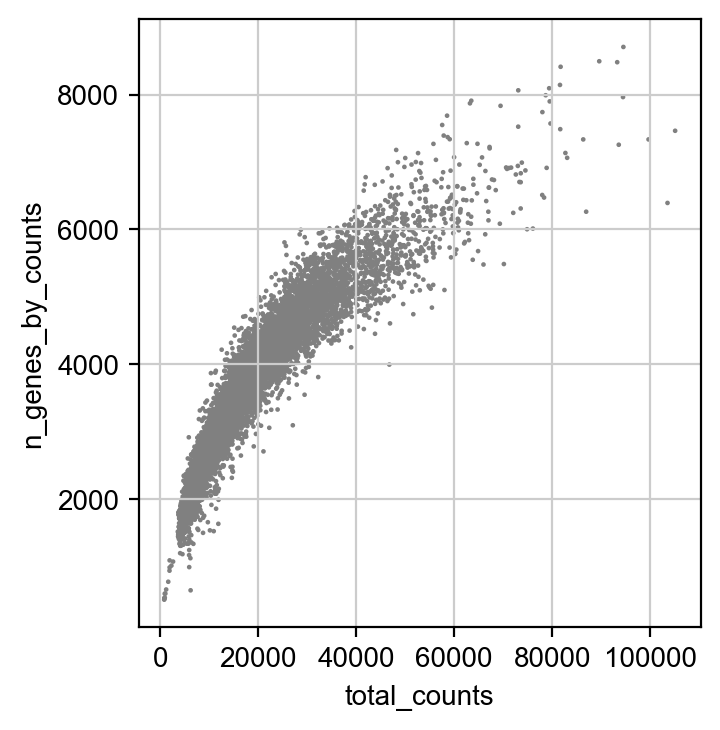

In [253]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [254]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.total_counts < 35000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

save post QC scanpy

In [255]:
adata

View of AnnData object with n_obs × n_vars = 9562 × 17537
    obs: 'sample', 'source', 'cell_type', 'cell_subtype_level1', 'cell_subtype_level2', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [256]:
resultsFileQC

'write/Ji2020_Skin_QC.h5ad'

In [257]:
adata.write(resultsFileQC)

# Analysis

In [258]:
resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

In [259]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [260]:
adata = sc.read_h5ad(resultsFileQC)
adata

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 9562 × 17537
    obs: 'sample', 'source', 'cell_type', 'cell_subtype_level1', 'cell_subtype_level2', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [261]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [262]:
sc.pp.log1p(adata)

In [263]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


1062


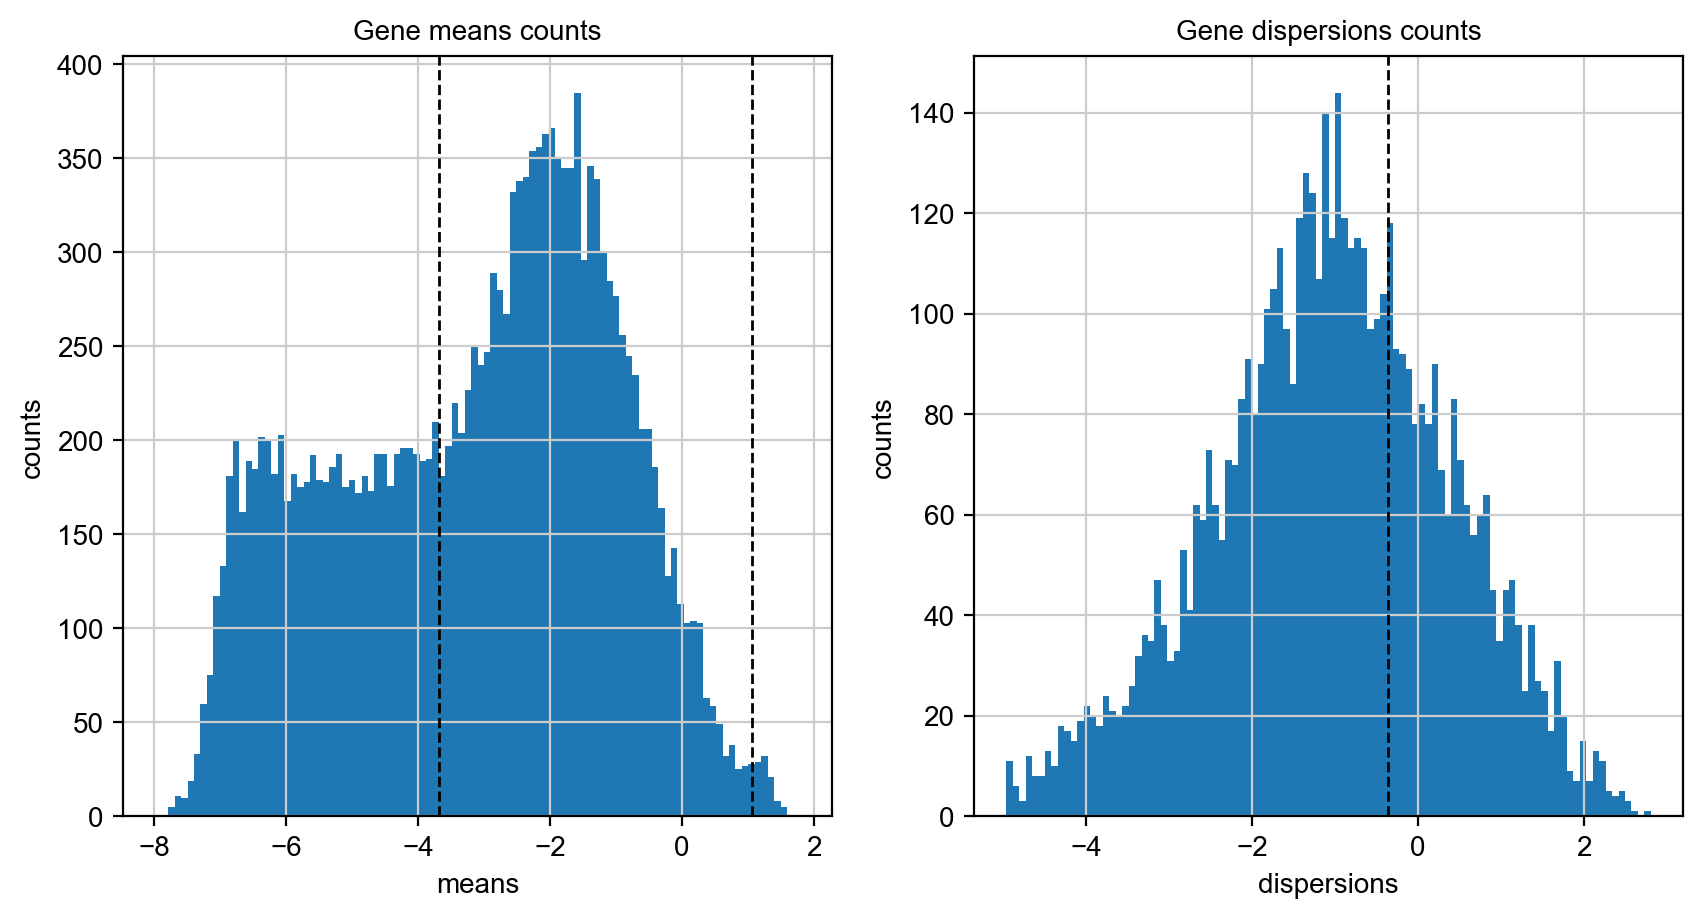

In [264]:
minMean = 0.025
maxMean = 2.9
minDisp = 0.7

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

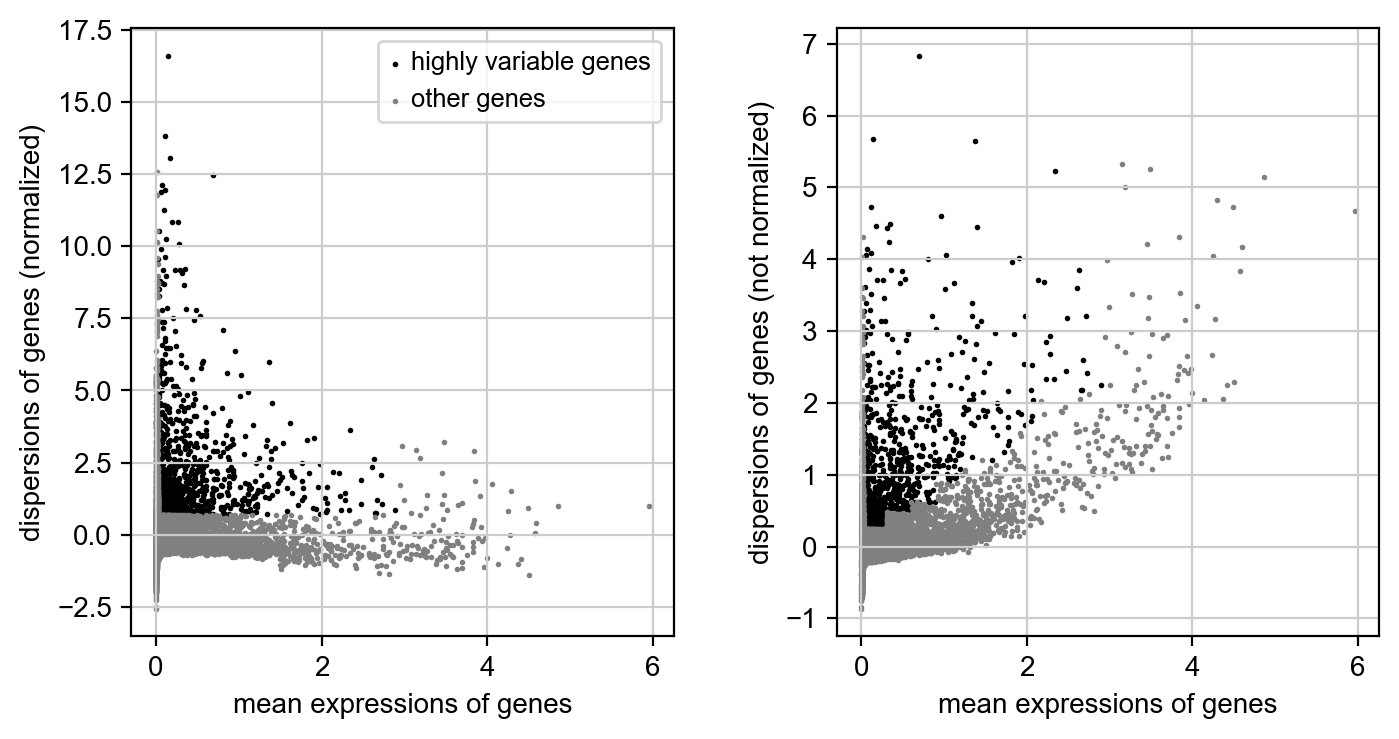

In [265]:
sc.pl.highly_variable_genes(adata)

In [266]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [267]:
adata.raw = adata

In [268]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [269]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [270]:
#sc.pp.scale(adata, max_value=10)

In [271]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:01)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


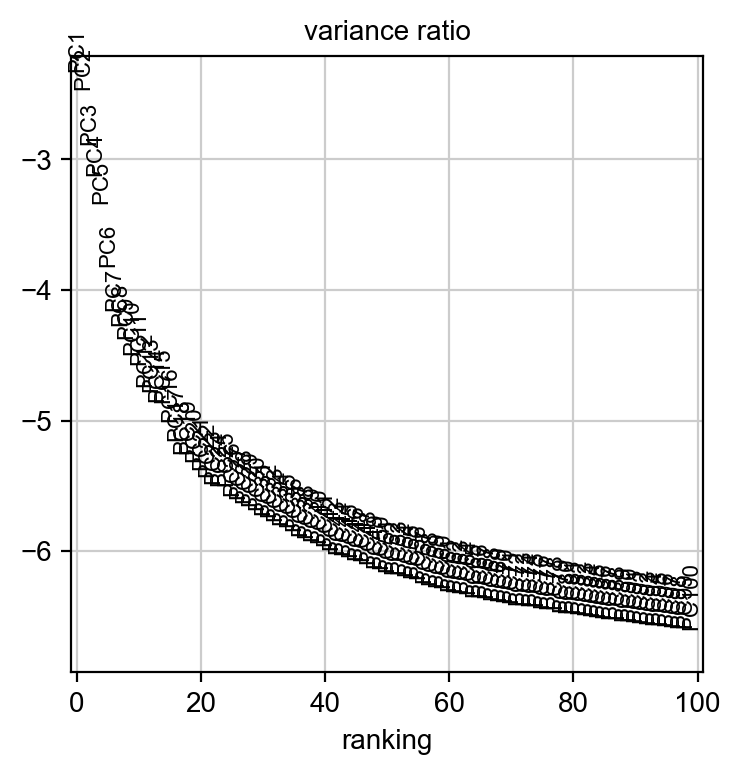

In [272]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

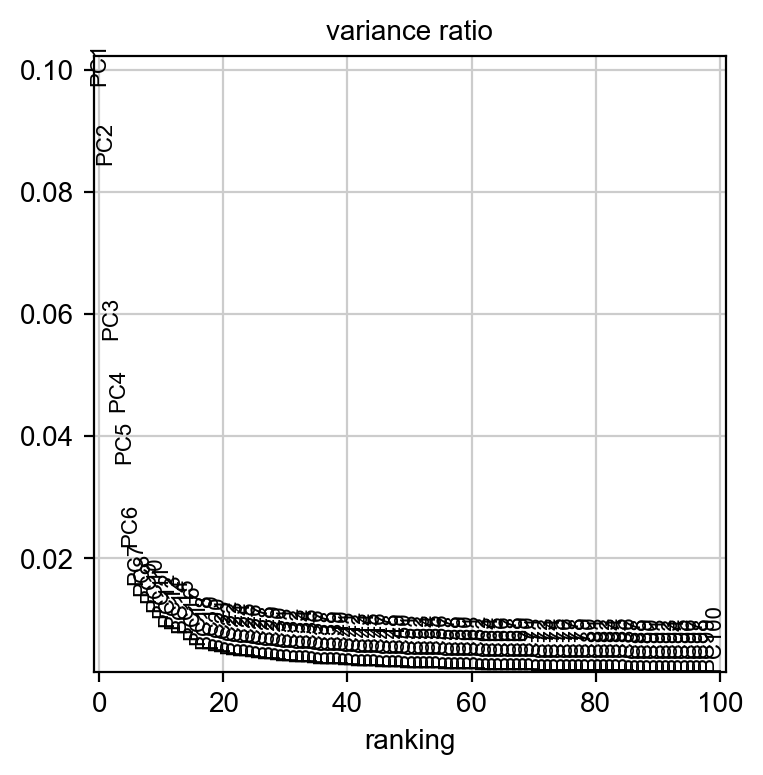

In [273]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [274]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [275]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [276]:
sc.tl.leiden(adata, resolution=0.1)

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [279]:
adata.obs["patient"] = [str(s) for s in adata.obs["sample"]]

In [280]:
adata.obs["diagnosis"] = [meta.loc[s].diagnosis_recurrence for s in adata.obs["sample"]]
#adata.obs["cancerType"] = [meta.loc[s].cancer_type for s in adata.obs["sample"]]
adata.obs["sex"] = [meta.loc[s].sex for s in adata.obs["sample"]]
adata.obs["site"] = [meta.loc[s].site for s in adata.obs["sample"]]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

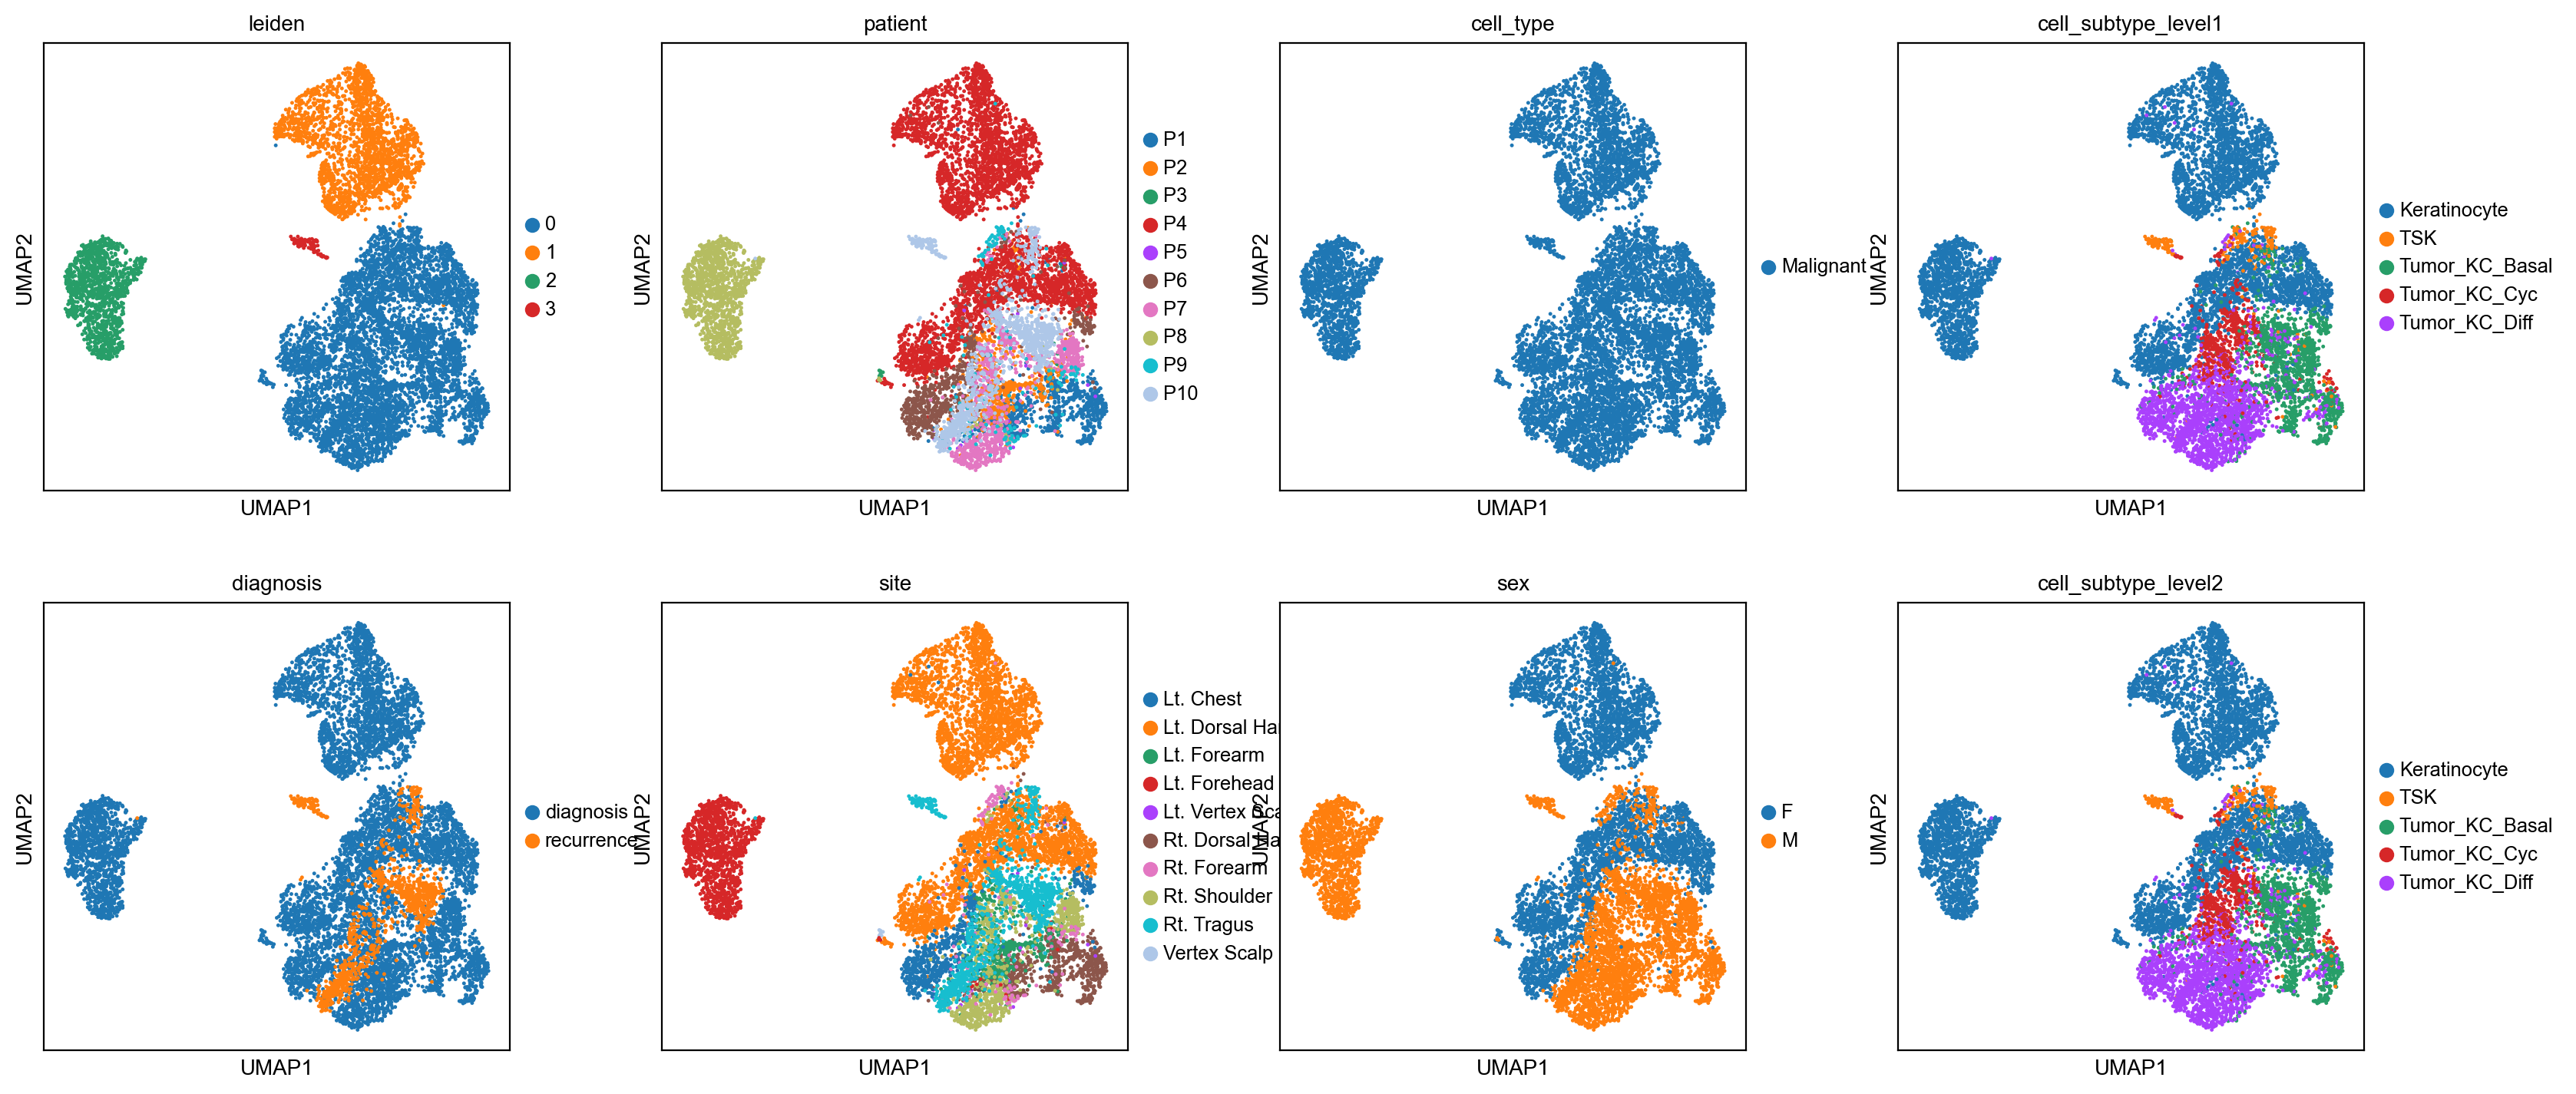

In [281]:
sc.pl.umap(adata, color=["leiden","patient","cell_type","cell_subtype_level1","diagnosis","site","sex","cell_subtype_level2"],ncols=4)

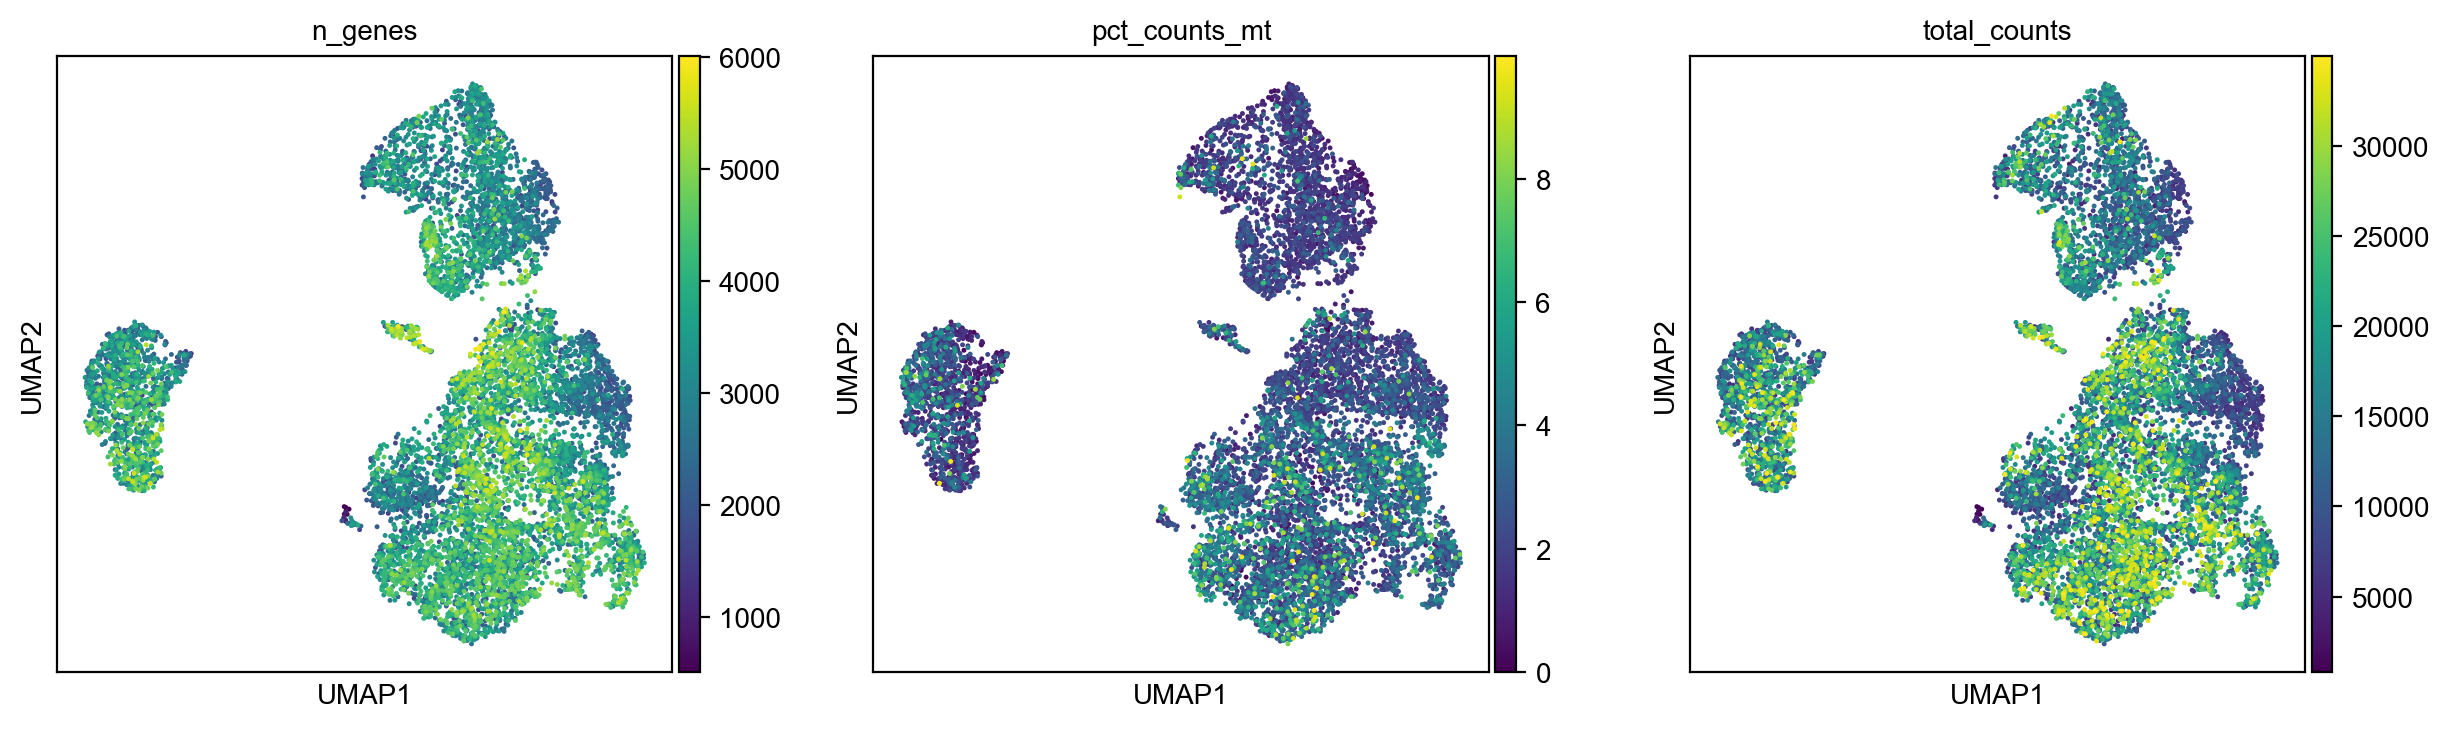

In [282]:
sc.pl.umap(adata, color=["n_genes","pct_counts_mt","total_counts"])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


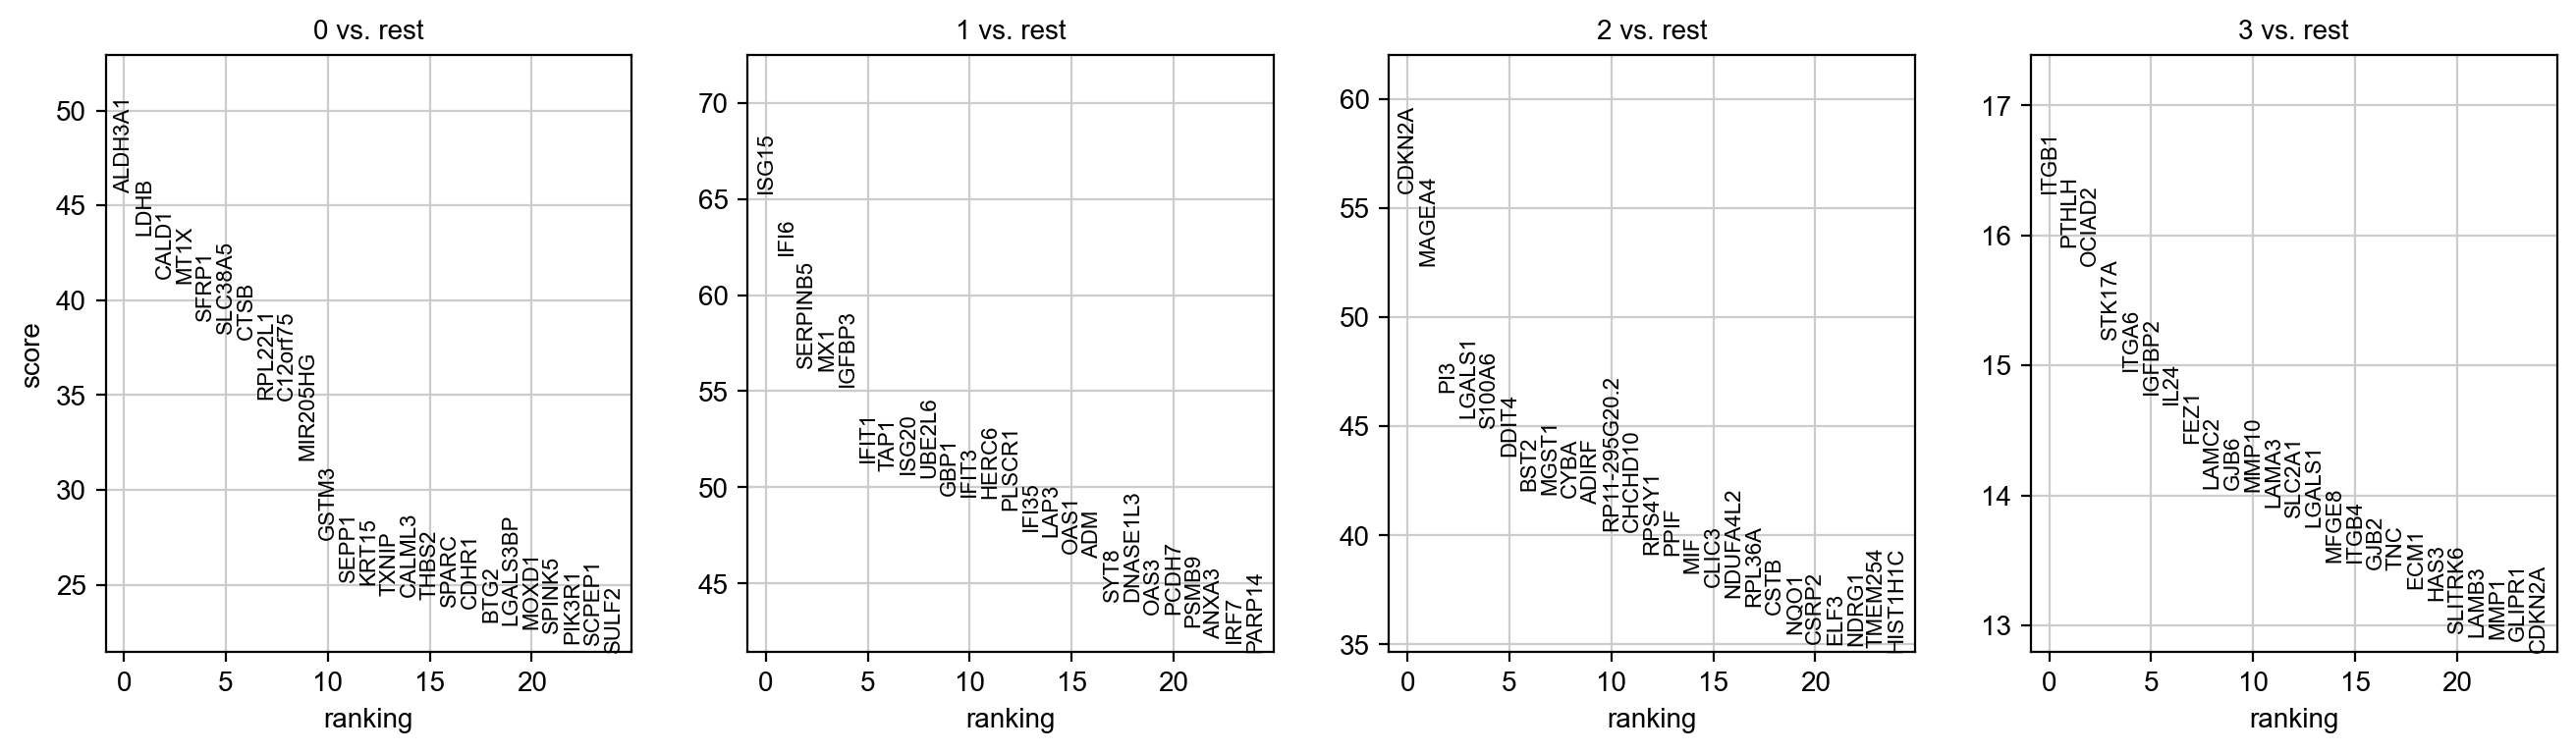

In [283]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [284]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

0         1              2       3
0    ALDH3A1     ISG15         CDKN2A   ITGB1
1       LDHB      IFI6         MAGEA4   PTHLH
2      CALD1  SERPINB5            PI3  OCIAD2
3       MT1X       MX1         LGALS1  STK17A
4      SFRP1    IGFBP3         S100A6   ITGA6
5    SLC38A5     IFIT1          DDIT4  IGFBP2
6       CTSB      TAP1           BST2    IL24
7    RPL22L1     ISG20          MGST1    FEZ1
8   C12orf75    UBE2L6           CYBA   LAMC2
9   MIR205HG      GBP1          ADIRF    GJB6
10     GSTM3     IFIT3  RP11-295G20.2   MMP10
11     SEPP1     HERC6        CHCHD10   LAMA3
12     KRT15    PLSCR1         RPS4Y1  SLC2A1
13     TXNIP     IFI35           PPIF  LGALS1
14    CALML3      LAP3            MIF   MFGE8

    using 'X_pca' with n_pcs = 40
Storing dendrogram info using `.uns['dendrogram_leiden']`


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What

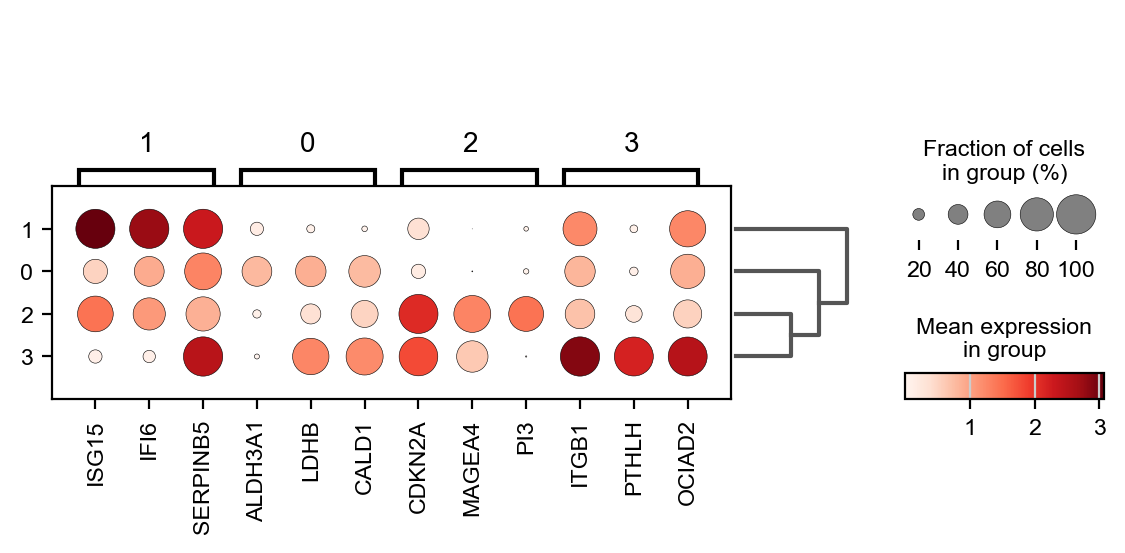

In [285]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=40)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [ ]:
resultsFile

In [ ]:
adata.write(resultsFile)
adata